In [1]:
%load_ext autoreload
%autoreload 2

# to enhance code development and update

# Download and Load Data

In [2]:
from src.data import download_data, DATA_PATH

download_data(force_download=False)

In [26]:
import pandas as pd

names = ["WikipediaId", "FreebaseId", "MovieName", "ReleaseDate",
         "Revenue", "Runtime", "Languages",
         "Countries", "Genres"] # from the README.txt
movie_data = pd.read_csv(DATA_PATH / "MovieSummaries" / "movie.metadata.tsv", sep="\t", names=names)
movie_data.head(2)

,WikipediaId,FreebaseId,MovieName,ReleaseDate,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


In [27]:
import pandas as pd

names = ["WikipediaId", "FreebaseId", "ReleaseDate", "CharacterName",
         "DateOfBirth", "Gender", "Height", "Ethnicity", "ActorName",
         "AgeAtRelease", "CharacterActorMapId", "CharacterId", "ActorId"] # from the README.txt
character_data = pd.read_csv(DATA_PATH / "MovieSummaries" / "character.metadata.tsv", sep="\t", names=names)
character_data.head(2)

,WikipediaId,FreebaseId,ReleaseDate,CharacterName,DateOfBirth,Gender,Height,Ethnicity,ActorName,AgeAtRelease,CharacterActorMapId,CharacterId,ActorId
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4


# Graph Creation

We will connect actors if they played in the same movie. Character Data Table is enough to do this, we can group by movie id

In [82]:
import networkx as nx

G = nx.Graph()
for movie_actors in character_data.groupby("WikipediaId").ActorId.unique():
    for actor_l in movie_actors:
        actors_set.add(actor_l)
        for actor_r in movie_actors:
            if actor_l != actor_r:
                G.add_edge(actor_l, actor_r)

In [83]:
print(f"Number of vertecies: {len(G.nodes)}, number of edges: {len(G.edges)}")

Number of vertecies: 135067, number of edges: 2084129


In [102]:
subgraph_actors_list = []
movies_for_subgraph = 4

for i, movie_actors in enumerate(character_data.groupby("WikipediaId").ActorId.unique()):
    if i >= movies_for_subgraph:
        break
    subgraph_actors_list.extend(movie_actors)


H = nx.subgraph(G, subgraph_actors_list)

In [103]:
print(f"Number of vertecies: {len(H.nodes)}, number of edges: {len(H.edges)}")

Number of vertecies: 44, number of edges: 263


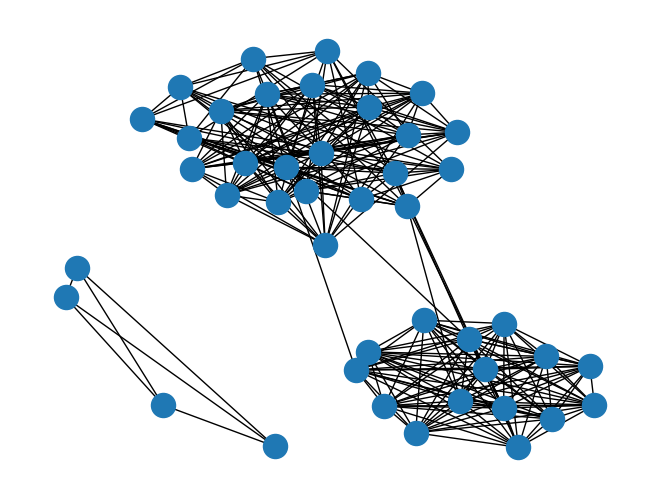

In [113]:
# https://stackoverflow.com/questions/14283341/how-to-increase-node-spacing-for-networkx-spring-layout
pos = nx.spring_layout(H, k=0.5, iterations=20)

nx.draw(H, pos=pos, with_labels=False)